Jiaxi Yang
3005626242

# **Decision Tree Classification: 50 Points**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

**STEP 1: Importing all the required libraries.**

In [4]:
# Libraries for data analysis
import numpy as np # For large multi-dimensional array and matrix processing
import pandas as pd # For data extraction and preparation

#The sklearn.tree module includes decision tree-based models for classification and regression.
from sklearn import tree

# Libraries for displaying results and analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

**STEP 2: Importing Dataset**

We are going to be using the wine toy dataset from SciKit Learn

In [2]:
from sklearn.datasets import load_wine
wine_data = load_wine()

You can optionally print the Description of the dataset for your reference.

In [3]:
print(wine_data.data.shape)
print(wine_data.target.shape)
print(wine_data.DESCR)

(178, 13)
(178,)
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of 

**STEP 3: Split the Dataset (10 Points)**

**TO DO:** Similar to the KNN Tutorial, split the given X and y data into X_train, X_test, y_train, y_test, using **test ratio of 0.3**.

In [4]:
X = wine_data.data
y = wine_data.target

##### INPUT CODE HERE (~1 line of code) ######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


##############################################

assert X_train.shape == (124,13)
assert y_train.shape == (124,)
assert X_test.shape == (54,13)
assert y_test.shape == (54,)

print("Size of training data= ", X_train.shape[0]," Samples")
print("Size of testing data= ", X_test.shape[0]," Samples")


Size of training data=  124  Samples
Size of testing data=  54  Samples


**STEP 4: Fit model to training data (10 Points)**

**TO DO:** Fit the given decision tree to X_train and y_train data. You may use [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) for reference.

In [5]:
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth=3)


##### INPUT CODE HERE (~1 line of code) ######
decision_tree.fit(X_train, y_train)


##############################################

print("Simple Visualization of the tree you created:")
print(tree.export_text(decision_tree, feature_names=wine_data.feature_names))


Simple Visualization of the tree you created:
|--- color_intensity <= 3.82
|   |--- proline <= 1002.50
|   |   |--- ash <= 3.00
|   |   |   |--- class: 1
|   |   |--- ash >  3.00
|   |   |   |--- class: 0
|   |--- proline >  1002.50
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.58
|   |   |--- class: 2
|   |--- flavanoids >  1.58
|   |   |--- proline <= 737.00
|   |   |   |--- class: 1
|   |   |--- proline >  737.00
|   |   |   |--- class: 0



**STEP 5: Testing the model (10 Points)**

**TO DO:** Find target predictions by giving **X_test** input to your model and store them in **y_pred**. You may need [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) for reference.

In [6]:
##### INPUT CODE HERE (~1 line of code) ######

y_pred = decision_tree.predict(X_test)

##############################################

**STEP 6: Visualize the Results  (20 Points)**

**TO DO:** Similar to the KNN Tutorial, plot confusion matrix, and accuracy of model predictions. Store accuracy in **acc** variable

You may need the following references:

[Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

[Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

[Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Accuracy of our model is equal to 94.44 %.


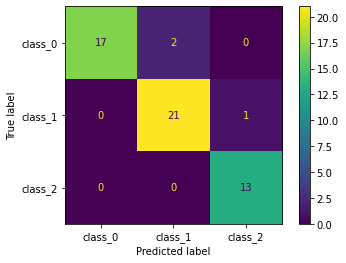

In [7]:
##### INPUT CODE HERE (~4 line of code) ######
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['class_0','class_1','class_2'])
cmd.plot()

acc = accuracy_score(y_test, y_pred)*100


##############################################

print('Accuracy of our model is equal to ' + str(round(acc, 2)) + ' %.')



---



# **Random Forrest Reggression: 50 Points**



Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:

**STEP 1: Importing all the required libraries.**

In [1]:
#The sklearn.ensemble module includes the RandomForest algorithm.
from sklearn.ensemble import RandomForestRegressor

# Libraries for calculating evaluation metrics
from sklearn.metrics import mean_squared_error

**STEP 2: Importing Dataset**

We are going to be using the California Housing dataset.
It contains 20640 samples with 8 dimensions to predict the value of a house.


In [2]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

You can optionally print the description and a few samples from the dataset for your reference.

In [5]:

print(housing_data.keys())
print(housing_data.data.shape)
print(housing_data.DESCR)

print(pd.DataFrame(housing_data.data)[:5])
print(pd.DataFrame(housing_data.target)[:5])


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
(20640, 8)
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California di

**STEP 3: Split the Dataset (10 Points)**

**TO DO:** Similar to the KNN Tutorial, split the given X and y data into X_train, X_test, y_train, y_test, using **test ratio of 0.3**.

In [6]:
X = housing_data.data
y = housing_data.target

##### INPUT CODE HERE (~1 line of code) ######

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


##############################################

assert X_train.shape == (14448, 8)
assert y_train.shape == (14448,)
assert X_test.shape == (6192, 8)
assert y_test.shape == (6192,)

print("Size of training data= ", X_train.shape[0]," Samples")
print("Size of testing data= ", X_test.shape[0]," Samples")


Size of training data=  14448  Samples
Size of testing data=  6192  Samples


**STEP 4: Fit model to training data (10 Points)**

**TO DO:** Fit the given decision tree to X_train and y_train data. You may use [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) for reference.

In [7]:
model = RandomForestRegressor()

##### INPUT CODE HERE (~1 line of code) ######

model.fit(X_train, y_train)

##############################################

RandomForestRegressor()

**STEP 4: Try Predicting Values**

**TO DO (optional) :** Change values of features to see changes in the predicted value of house

In [8]:

val1 = 8.3252
val2 = 41.0
val3 = 6.984127
val4 = 1.023810
val5 = 322.0
val6 = 2.555556
val7 = 37.88
val8 = -122.23

row = [[val1, val2, val3, val4, val5, val6, val7, val8]]

# make a single prediction
yhat = model.predict(row)

print('House Value Prediction= $',yhat[0]*100000)

House Value Prediction= $ 443919.06000000035


**STEP 5: Testing the model (10 Points)**

**TO DO:** Find target predictions by giving **X_test** input to your model and store them in **y_pred**. You may need [this link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) for reference.

In [9]:
##### INPUT CODE HERE (~1 line of code) ######

y_pred = model.predict(X_test)

##############################################

**STEP 6: Visualize the Results (20 Points)**

**TO DO:** Since this is not a classification task, we cannot plot confusion matrix. Instead we ask you to find the mean square error evaluated on all the testing data and store it in **mse**.

You may need the following reference:

[Mean Square Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


In [10]:
##### INPUT CODE HERE (~1 line of code) ######

mse = mean_squared_error(y_test, y_pred)

##############################################

print("Mean Squared Error = ",mse)

Mean Squared Error =  0.27577957743543047




---



# **Hyperparameter Tuning (FYI Only)**

This section is for your information only. Simply run the code cells one by one.

We will take a closer look at some of the hyperparameters you should consider tuning for the random forest ensemble and their effect on model performance.

We select the hyperparameters that give us the lowest error rate or Mean Square Error in this case.

First we define a function to evaluate a model using the mean square error metric.

In [11]:
def find_mse(model, X, y):

  yhat = model.predict(X)
  mse = mean_squared_error(y,yhat) 

  return mse

Next we define a function to test out various models and plot how the Mean Square Error evolves with respect to the hyperparameter in question.

In [12]:
from matplotlib import pyplot

def plot_tuning(models_dict,X_train,X_test,y_train,y_test):

  results, names = list(), list()

  for name, model in models_dict.items():

    model.fit(X_train, y_train)
    mse = find_mse(model, X_test, y_test)
  
    results.append(mse)
    names.append(name)
    print("Hyperparameter= ",name,"; MSE = ",mse)


    n = [float(i) for i in names]

  pyplot.plot(n,results)
  pyplot.ylabel('Mean Square Error')
  pyplot.xlabel('Hyperparameter')
  pyplot.show()

**Hyperparameter:** max_samples.

The **max_samples** argument can be set to a float between 0 and 1 to control the percentage of the size of the training dataset to make the sample used to train each decision tree. **None** means that the entire training set will be used to train each tree.

In [13]:
#Store various models into a dictionary of models
models_dict = dict()
for i in np.arange(0.1, 1.1, 0.1):
  # set max_samples=None to use 100%
  key = round(i,2)
  if i == 1.0:
    i = None
  models_dict[key] = RandomForestRegressor(max_samples=i)
  

Hyperparameter=  0.1 ; MSE =  0.3314494737047598
Hyperparameter=  0.2 ; MSE =  0.3060864469533888
Hyperparameter=  0.3 ; MSE =  0.294459463851622
Hyperparameter=  0.4 ; MSE =  0.28647322584464086
Hyperparameter=  0.5 ; MSE =  0.28301578429163615
Hyperparameter=  0.6 ; MSE =  0.27953694360121495
Hyperparameter=  0.7 ; MSE =  0.2802174300575036
Hyperparameter=  0.8 ; MSE =  0.2769243431976369
Hyperparameter=  0.9 ; MSE =  0.2746504762111737
Hyperparameter=  1.0 ; MSE =  0.27276001544806605


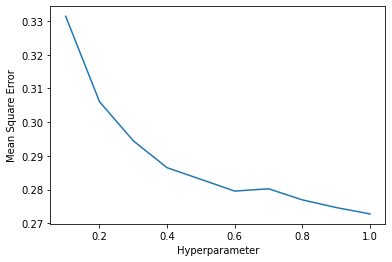

In [14]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)

**Hyperparameter:** max_features.

The number of features that is randomly sampled for each split point is perhaps the most important feature to configure for random forest.

In [15]:
#Store various models into a dictionary of models
models_dict = dict()

for i in range(1,8):
  models_dict[str(i)] = RandomForestRegressor(max_features=i)


In [ ]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)

Hyperparameter=  1 ; MSE =  0.2905078678959592
Hyperparameter=  2 ; MSE =  0.24829725052450716
Hyperparameter=  3 ; MSE =  0.2481640675554295
Hyperparameter=  4 ; MSE =  0.25616517441318903
Hyperparameter=  5 ; MSE =  0.262933983385943
Hyperparameter=  6 ; MSE =  0.26590198697806405


**Hyperparameter:** n_estimators.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case.

In [ ]:
#Store various models into a dictionary of models
models_dict = dict()

n_trees = [10, 50, 100, 500, 1000]
for n in n_trees:
  models_dict[str(n)] = RandomForestRegressor(n_estimators=n)

In [ ]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)

**Hyperparameter:** max_depth.

A final interesting hyperparameter is the maximum depth of decision trees used in the ensemble.

By default, trees are constructed to an arbitrary depth and are not pruned. This is a sensible default, although we can also explore fitting trees with different fixed depths.

In [ ]:
#Store various models into a dictionary of models
models_dict = dict()

depths = [i for i in range(1,8)] + [None]
for n in depths:
  if n==None:
    models_dict["8"] = RandomForestRegressor(max_depth=n)
  else:
    models_dict[str(n)] = RandomForestRegressor(max_depth=n)

In [ ]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)